<a href="https://colab.research.google.com/github/mutimrd2n/UL-Clustering/blob/main/UL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

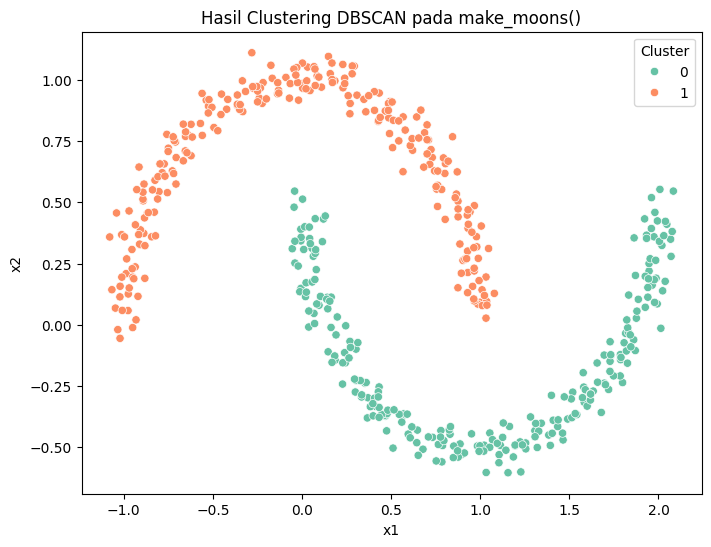

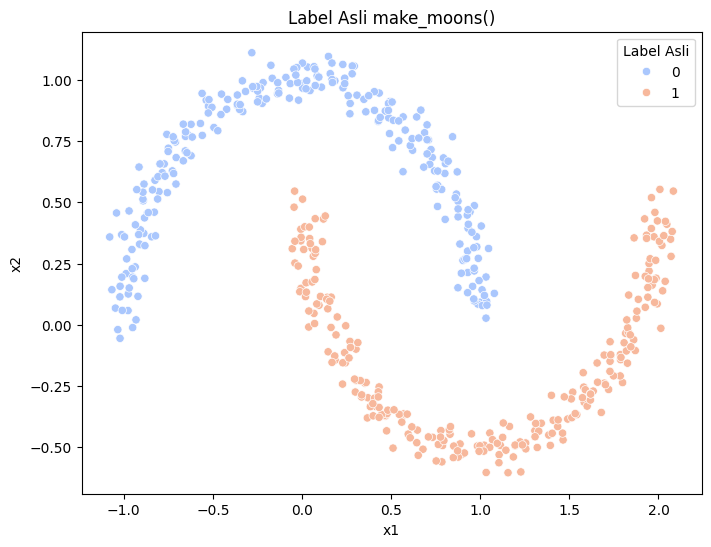

In [5]:
# 📦 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# 🎯 1. Buat Dataset make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Simpan ke DataFrame
df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y  # Label asli untuk perbandingan

# 🔧 2. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["x1", "x2"]])  # hanya fitur, tanpa label

# 📊 3. PCA (Opsional karena data sudah 2D)
# Kalau mau lihat visualisasi lebih rapi atau nanti pakai >2 fitur
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔍 4. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Simpan ke DataFrame
df['Cluster'] = clusters

# 🎨 5. Visualisasi Hasil Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='Cluster', palette='Set2')
plt.title("Hasil Clustering DBSCAN pada make_moons()")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Cluster")
plt.show()

# 📈 (Opsional) Bandingkan dengan Label Asli
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["x1"], y=df["x2"], hue=df["label"], palette="coolwarm")
plt.title("Label Asli make_moons()")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Label Asli")
plt.show()